In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ola-vs-uber-play-store-reviews/Ola Customer Reviews.csv
/kaggle/input/ola-vs-uber-play-store-reviews/Uber Customer Reviews.csv


# Comparing between Ola and Uber Services in India by sentiment analysis and customer satisfication

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re 
import nltk
plt.style.use('ggplot')

In [3]:
data_ola=pd.read_csv('/kaggle/input/ola-vs-uber-play-store-reviews/Ola Customer Reviews.csv')
data_ola

source                             review_id         user_name  \
0       Google Play  fbc7ffc9-5a89-446e-87fd-d69bf4a7f984     Puipuii Ralte   
1       Google Play  5a0051fb-220a-45b2-ba94-a15a2949218f      Deepak Kumar   
2       Google Play  71ebf933-b734-474d-bb65-a18c90906ed2  Ahamed Azarudeen   
3       Google Play  e1cc0010-60b3-4126-99c2-e8549088566a        Rahil Syed   
4       Google Play  77cf1be1-b428-4493-ae25-e0f288f79b8f           vin 007   
...             ...                                   ...               ...   
357693    App Store  575258ed-aec1-47ea-b792-88deb17e4ad7          Jayken17   
357694    App Store  ca91ebc0-92d9-48a6-9c46-7dcad1a0546e       cbarath1986   
357695    App Store  f7227b64-90aa-4c82-996e-c86d99761831          MaS Mitt   
357696    App Store  5f14c66e-94cc-4594-a83e-055ab8721ca8         vasantha2   
357697    App Store  b4f2a564-e5aa-48d5-bbc0-8b8e2751628e          June Day   

                          review_title  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
357693  Can't sign up with App200 code   
357694     Worst app n online services   
357695   Signup itself is so difficult   
357696                Worst iphone App   
357697                        Hopeless   

                                       review_description  rating  thumbs_up  \
0       The map in Ola is so messed up, i have to pay ...       1        0.0   
1                                 Deepak Kumar.... 🙏🙏🙏🙏🙏]       5        0.0   
2       Such aa irresponsible app more then I waiting ...       1        0.0   
3                                                   Worst       1        0.0   
4       Too much expensive .. try UBer... They are pro...       1        0.0   
...                                                   ...     ...        ...   
357693  The app is useless for new users since you can...       1        NaN   
357694  Do not recharge money with ola money.. I have ...       1        NaN   
357695  The app hangs on signup. Later I get authentic...       2        NaN   
357696  one of the worst app for iphone.i was tried mu...       1        NaN   
357697  This company is hopeless. I waited on hold for...       1        NaN   

                review_date developer_response developer_response_date  \
0       2023-08-10 16:40:50                NaN                     NaN   
1       2023-08-10 16:36:14                NaN                     NaN   
2       2023-08-10 16:29:31                NaN                     NaN   
3       2023-08-10 15:52:06                NaN                     NaN   
4       2023-08-10 15:51:10                NaN                     NaN   
...                     ...                ...                     ...   
357693  2015-03-08 04:33:32                NaN                     NaN   
357694  2015-03-02 23:13:22                NaN                     NaN   
357695  2015-03-02 11:52:50                NaN                     NaN   
357696  2015-02-17 15:17:12                NaN                     NaN   
357697  2014-10-16 08:53:01                NaN                     NaN   

       appVersion laguage_code country_code  
0           6.3.2           en           in  
1             NaN           en           in  
2           6.3.1           en           in  
3           5.0.4           en           in  
4             NaN           en           in  
...           ...          ...          ...  
357693        NaN           en           in  
357694        NaN           en           in  
357695        NaN           en           in  
357696        NaN           en           in  
357697        NaN           en           in  

[357698 rows x 13 columns]

In [4]:
data_uber=pd.read_csv('/kaggle/input/ola-vs-uber-play-store-reviews/Uber Customer Reviews.csv')
data_uber

source                             review_id          user_name  \
0        Google Play  18d6584c-d0e9-4833-a744-f607058aee97          Milky Way   
1        Google Play  50a08f18-cece-4ddf-b617-028844c8aa28     Bradlee Severa   
2        Google Play  b0d8e75a-80a7-4dcd-abaf-72b046dbeeb7      Amit Aggarwal   
3        Google Play  502702a9-25ed-4373-a96c-7fa1f06caacd       Bryant Inman   
4        Google Play  f47a3fb6-23db-49bd-9e63-f33c8d724d07    Addie Whittaker   
...              ...                                   ...                ...   
1069611    App Store  015547c9-1d97-4b92-8206-ef47a540b70b  Ad hater 20140323   
1069612    App Store  e1125a24-a804-419e-8aa2-039e3f380d25        valeramos02   
1069613    App Store  132aac5d-10df-4207-a71d-01d81a4efde0        Janeé Brown   
1069614    App Store  99864769-f3f9-49fc-841e-3230a72fe18e        zachwiesler   
1069615    App Store  93f3188d-db2e-4532-bde3-6ec432558b5b       formerbaker1   

                                              review_title  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1069611                                       Map problems   
1069612                                   Quality decrease   
1069613  Uber pool walking blocks to get to the ride is...   
1069614                          TERRIBLE CUSTOMER SERVICE   
1069615                              Poor Customer Service   

                                        review_description  rating  thumbs_up  \
0        Suddenly, the driver can't have my location an...       1        0.0   
1        Very cordial.. And helped with a quick turnaro...       5        0.0   
2                                     Very good experience       5        0.0   
3                                                All I use       5        0.0   
4        I have enjoyed traveling by Uber my drivers ha...       5        0.0   
...                                                    ...     ...        ...   
1069611  I tried to find away to report problems direct...       3        NaN   
1069612  I used to love Uber, specially the Uber pool s...       2        NaN   
1069613  If I wanted to take a bus to be dropped off on...       1        NaN   
1069614  Hello\n\nSTORY TIME\n\nI wanted to delete JUST...       1        NaN   
1069615  The past couple times I’ve ridden with Uber, I...       1        NaN   

                 review_date  \
0        2023-08-10 17:48:51   
1        2023-08-10 17:38:35   
2        2023-08-10 17:38:17   
3        2023-08-10 17:37:45   
4        2023-08-10 17:36:56   
...                      ...   
1069611  2019-02-20 19:41:25   
1069612  2019-01-24 12:13:39   
1069613  2019-01-14 16:53:31   
1069614  2019-01-06 17:19:59   
1069615  2019-01-06 12:34:01   

                                        developer_response  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1069611  {'id': 7416266, 'body': "Hi, this doesn't soun...   
1069612  {'id': 7006213, 'body': "Hi, uber works better...   
1069613  {'id': 6859976, 'body': 'Hi Janee, this certai...   
1069614                                                NaN   
1069615  {'id': 6709611, 'body': 'Hi, this certainly so...   

        developer_response_date   appVersion laguage_code country_code  
0                           NaN          NaN           en           in  
1                           NaN  4.485.10000   

# Ola customer reviews

In [5]:
data_ola.head()

source                             review_id         user_name  \
0  Google Play  fbc7ffc9-5a89-446e-87fd-d69bf4a7f984     Puipuii Ralte   
1  Google Play  5a0051fb-220a-45b2-ba94-a15a2949218f      Deepak Kumar   
2  Google Play  71ebf933-b734-474d-bb65-a18c90906ed2  Ahamed Azarudeen   
3  Google Play  e1cc0010-60b3-4126-99c2-e8549088566a        Rahil Syed   
4  Google Play  77cf1be1-b428-4493-ae25-e0f288f79b8f           vin 007   

  review_title                                 review_description  rating  \
0          NaN  The map in Ola is so messed up, i have to pay ...       1   
1          NaN                            Deepak Kumar.... 🙏🙏🙏🙏🙏]       5   
2          NaN  Such aa irresponsible app more then I waiting ...       1   
3          NaN                                              Worst       1   
4          NaN  Too much expensive .. try UBer... They are pro...       1   

   thumbs_up          review_date developer_response developer_response_date  \
0        0.0  2023-08-10 16:40:50                NaN                     NaN   
1        0.0  2023-08-10 16:36:14                NaN                     NaN   
2        0.0  2023-08-10 16:29:31                NaN                     NaN   
3        0.0  2023-08-10 15:52:06                NaN                     NaN   
4        0.0  2023-08-10 15:51:10                NaN                     NaN   

  appVersion laguage_code country_code  
0      6.3.2           en           in  
1        NaN           en           in  
2      6.3.1           en           in  
3      5.0.4           en           in  
4        NaN           en           in

# Data Preprocessing

In [6]:
data_ola.shape

(357698, 13)

In [7]:
data_ola.isna().sum()

source                          0
review_id                       0
user_name                       0
review_title               356807
review_description             16
rating                          0
thumbs_up                     891
review_date                     0
developer_response         232929
developer_response_date    233108
appVersion                  82372
laguage_code                    0
country_code                    0
dtype: int64

In [8]:
data_ola['source'].value_counts()

Google Play    356807
App Store         891
Name: source, dtype: int64

In [9]:
data_ola['thumbs_up'].value_counts()

0.0      330697
1.0       13521
2.0        3569
3.0        1764
4.0        1105
          ...  
263.0         1
189.0         1
311.0         1
251.0         1
366.0         1
Name: thumbs_up, Length: 405, dtype: int64

# drop unnecessary columns

In [10]:
data_ola=data_ola.drop(['review_title','developer_response','developer_response_date','source','laguage_code','thumbs_up','review_id','user_name','appVersion'],axis=1)

In [11]:
data_ola.head()

review_description  rating  \
0  The map in Ola is so messed up, i have to pay ...       1   
1                            Deepak Kumar.... 🙏🙏🙏🙏🙏]       5   
2  Such aa irresponsible app more then I waiting ...       1   
3                                              Worst       1   
4  Too much expensive .. try UBer... They are pro...       1   

           review_date country_code  
0  2023-08-10 16:40:50           in  
1  2023-08-10 16:36:14           in  
2  2023-08-10 16:29:31           in  
3  2023-08-10 15:52:06           in  
4  2023-08-10 15:51:10           in

In [12]:
data_ola['country_code'].value_counts()

in    357698
Name: country_code, dtype: int64

In [13]:
data_ola.drop('country_code',axis=1,inplace=True)

In [14]:
data_ola.head()

review_description  rating  \
0  The map in Ola is so messed up, i have to pay ...       1   
1                            Deepak Kumar.... 🙏🙏🙏🙏🙏]       5   
2  Such aa irresponsible app more then I waiting ...       1   
3                                              Worst       1   
4  Too much expensive .. try UBer... They are pro...       1   

           review_date  
0  2023-08-10 16:40:50  
1  2023-08-10 16:36:14  
2  2023-08-10 16:29:31  
3  2023-08-10 15:52:06  
4  2023-08-10 15:51:10

In [15]:
data_ola['review_date']

0         2023-08-10 16:40:50
1         2023-08-10 16:36:14
2         2023-08-10 16:29:31
3         2023-08-10 15:52:06
4         2023-08-10 15:51:10
                 ...         
357693    2015-03-08 04:33:32
357694    2015-03-02 23:13:22
357695    2015-03-02 11:52:50
357696    2015-02-17 15:17:12
357697    2014-10-16 08:53:01
Name: review_date, Length: 357698, dtype: object

In [16]:
data_ola.isna().sum()

review_description    16
rating                 0
review_date            0
dtype: int64

# drop missing values
**because it is very small**

In [17]:
data_ola.dropna(inplace=True)

In [18]:
data_ola.shape

(357682, 3)

# drop duplicated values

In [19]:
data_ola.duplicated().sum()

1

In [20]:
data_ola.drop_duplicates(inplace=True)

In [21]:
data_ola

review_description  rating  \
0       The map in Ola is so messed up, i have to pay ...       1   
1                                 Deepak Kumar.... 🙏🙏🙏🙏🙏]       5   
2       Such aa irresponsible app more then I waiting ...       1   
3                                                   Worst       1   
4       Too much expensive .. try UBer... They are pro...       1   
...                                                   ...     ...   
357693  The app is useless for new users since you can...       1   
357694  Do not recharge money with ola money.. I have ...       1   
357695  The app hangs on signup. Later I get authentic...       2   
357696  one of the worst app for iphone.i was tried mu...       1   
357697  This company is hopeless. I waited on hold for...       1   

                review_date  
0       2023-08-10 16:40:50  
1       2023-08-10 16:36:14  
2       2023-08-10 16:29:31  
3       2023-08-10 15:52:06  
4       2023-08-10 15:51:10  
...                     ...  
357693  2015-03-08 04:33:32  
357694  2015-03-02 23:13:22  
357695  2015-03-02 11:52:50  
357696  2015-02-17 15:17:12  
357697  2014-10-16 08:53:01  

[357681 rows x 3 columns]

In [22]:
data_ola.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357681 entries, 0 to 357697
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_description  357681 non-null  object
 1   rating              357681 non-null  int64 
 2   review_date         357681 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.9+ MB


# convert date column to year & month and day and to datetime

In [23]:
data_ola['review_date'] = pd.to_datetime(data_ola['review_date']).dt.strftime('%Y-%m-%d')

In [24]:
data_ola

review_description  rating review_date
0       The map in Ola is so messed up, i have to pay ...       1  2023-08-10
1                                 Deepak Kumar.... 🙏🙏🙏🙏🙏]       5  2023-08-10
2       Such aa irresponsible app more then I waiting ...       1  2023-08-10
3                                                   Worst       1  2023-08-10
4       Too much expensive .. try UBer... They are pro...       1  2023-08-10
...                                                   ...     ...         ...
357693  The app is useless for new users since you can...       1  2015-03-08
357694  Do not recharge money with ola money.. I have ...       1  2015-03-02
357695  The app hangs on signup. Later I get authentic...       2  2015-03-02
357696  one of the worst app for iphone.i was tried mu...       1  2015-02-17
357697  This company is hopeless. I waited on hold for...       1  2014-10-16

[357681 rows x 3 columns]

In [25]:
data_ola['review_date'] = pd.to_datetime(data_ola['review_date'])

In [26]:
data_ola.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357681 entries, 0 to 357697
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   review_description  357681 non-null  object        
 1   rating              357681 non-null  int64         
 2   review_date         357681 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.9+ MB


In [27]:
data_ola.head()

review_description  rating review_date
0  The map in Ola is so messed up, i have to pay ...       1  2023-08-10
1                            Deepak Kumar.... 🙏🙏🙏🙏🙏]       5  2023-08-10
2  Such aa irresponsible app more then I waiting ...       1  2023-08-10
3                                              Worst       1  2023-08-10
4  Too much expensive .. try UBer... They are pro...       1  2023-08-10

In [28]:
data_ola['review_description'][0]

'The map in Ola is so messed up, i have to pay Rs.100 extra because the map is incorrect in the app..... I request you to fix this issue as soon as possible.'

# data preprocessing and cleaning reviews feature by NLTK and re libraries

In [29]:
from nltk.corpus import stopwords
import string

# Load the stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

data_ola['clean_description'] = data_ola['review_description'].apply(lambda x: ' '.join([word for word in re.sub(r'[^a-zA-Z]', ' ', x).split() if word.lower() not in stopwords]))

# Remove numbers
data_ola['clean_description'] = data_ola['clean_description'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove non-ASCII characters
data_ola['clean_description'] = data_ola['clean_description'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# Remove punctuation
data_ola['clean_description'] = data_ola['clean_description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
data_ola

review_description  rating review_date  \
0       The map in Ola is so messed up, i have to pay ...       1  2023-08-10   
1                                 Deepak Kumar.... 🙏🙏🙏🙏🙏]       5  2023-08-10   
2       Such aa irresponsible app more then I waiting ...       1  2023-08-10   
3                                                   Worst       1  2023-08-10   
4       Too much expensive .. try UBer... They are pro...       1  2023-08-10   
...                                                   ...     ...         ...   
357693  The app is useless for new users since you can...       1  2015-03-08   
357694  Do not recharge money with ola money.. I have ...       1  2015-03-02   
357695  The app hangs on signup. Later I get authentic...       2  2015-03-02   
357696  one of the worst app for iphone.i was tried mu...       1  2015-02-17   
357697  This company is hopeless. I waited on hold for...       1  2014-10-16   

                                        clean_description  
0       map Ola messed pay Rs extra map incorrect app ...  
1                                            Deepak Kumar  
2       aa irresponsible app waiting hour waste app pl...  
3                                                   Worst  
4       much expensive try UBer providing cheap rides ...  
...                                                   ...  
357693     app useless new users since sign referral code  
357694  recharge money ola money recharged rs n dint g...  
357695  app hangs signup Later get authentication code...  
357696  one worst app iphone tried multiple times neve...  
357697  company hopeless waited hold forever couple ti...  

[357681 rows x 4 columns]

In [31]:
data_ola['clean_description'][0]

'map Ola messed pay Rs extra map incorrect app request fix issue soon possible'

# Sentiment analysis by VADER

In [32]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()
data_ola['scores']=data_ola['clean_description'].apply(lambda clean_description:sid.polarity_scores(clean_description))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
data_ola.head()

review_description  rating review_date  \
0  The map in Ola is so messed up, i have to pay ...       1  2023-08-10   
1                            Deepak Kumar.... 🙏🙏🙏🙏🙏]       5  2023-08-10   
2  Such aa irresponsible app more then I waiting ...       1  2023-08-10   
3                                              Worst       1  2023-08-10   
4  Too much expensive .. try UBer... They are pro...       1  2023-08-10   

                                   clean_description  \
0  map Ola messed pay Rs extra map incorrect app ...   
1                                       Deepak Kumar   
2  aa irresponsible app waiting hour waste app pl...   
3                                              Worst   
4  much expensive try UBer providing cheap rides ...   

                                              scores  
0  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.356, 'neu': 0.5, 'pos': 0.144, 'comp...  
3  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

# extract compund only to see the polarity in reviews

In [34]:
data_ola['compound']=data_ola['scores'].apply(lambda d:d['compound'])

In [35]:
data_ola.head()

review_description  rating review_date  \
0  The map in Ola is so messed up, i have to pay ...       1  2023-08-10   
1                            Deepak Kumar.... 🙏🙏🙏🙏🙏]       5  2023-08-10   
2  Such aa irresponsible app more then I waiting ...       1  2023-08-10   
3                                              Worst       1  2023-08-10   
4  Too much expensive .. try UBer... They are pro...       1  2023-08-10   

                                   clean_description  \
0  map Ola messed pay Rs extra map incorrect app ...   
1                                       Deepak Kumar   
2  aa irresponsible app waiting hour waste app pl...   
3                                              Worst   
4  much expensive try UBer providing cheap rides ...   

                                              scores  compound  
0  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...   -0.4215  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  
2  {'neg': 0.356, 'neu': 0.5, 'pos': 0.144, 'comp...   -0.5267  
3  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...   -0.6249  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000

# determine the positive & neautral and negative

In [36]:
def getsentiment(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neautral'
    else:
        return 'positive'
# create a new column to store the sentiment
data_ola['sentiment']=data_ola['compound'].apply(getsentiment)

In [37]:
data_ola.head()

review_description  rating review_date  \
0  The map in Ola is so messed up, i have to pay ...       1  2023-08-10   
1                            Deepak Kumar.... 🙏🙏🙏🙏🙏]       5  2023-08-10   
2  Such aa irresponsible app more then I waiting ...       1  2023-08-10   
3                                              Worst       1  2023-08-10   
4  Too much expensive .. try UBer... They are pro...       1  2023-08-10   

                                   clean_description  \
0  map Ola messed pay Rs extra map incorrect app ...   
1                                       Deepak Kumar   
2  aa irresponsible app waiting hour waste app pl...   
3                                              Worst   
4  much expensive try UBer providing cheap rides ...   

                                              scores  compound sentiment  
0  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...   -0.4215  negative  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neautral  
2  {'neg': 0.356, 'neu': 0.5, 'pos': 0.144, 'comp...   -0.5267  negative  
3  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...   -0.6249  negative  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neautral

# data visualization (EDA)

<Axes: ylabel='sentiment'>

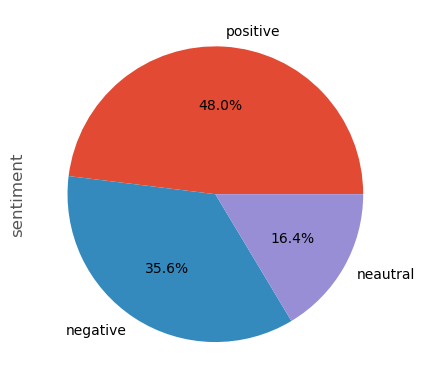

In [38]:
data_ola['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%')

**in Ola company the negative reviews is very high and positive is low**

<Axes: ylabel='rating'>

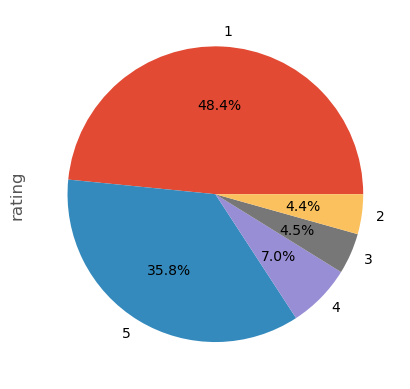

In [39]:
data_ola['rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')

**as we see the 1 star rating is very high that is because there are too much negative reviews**

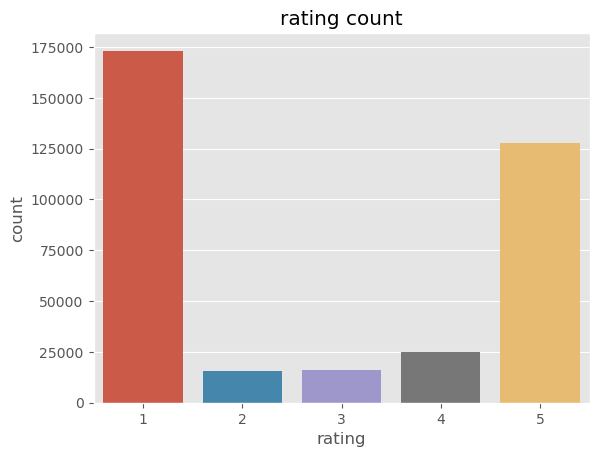

In [40]:
sns.countplot(data=data_ola,x='rating')
plt.title('rating count')
plt.show()

# visualizing the frequent of all words to determine the most positive and negative words.

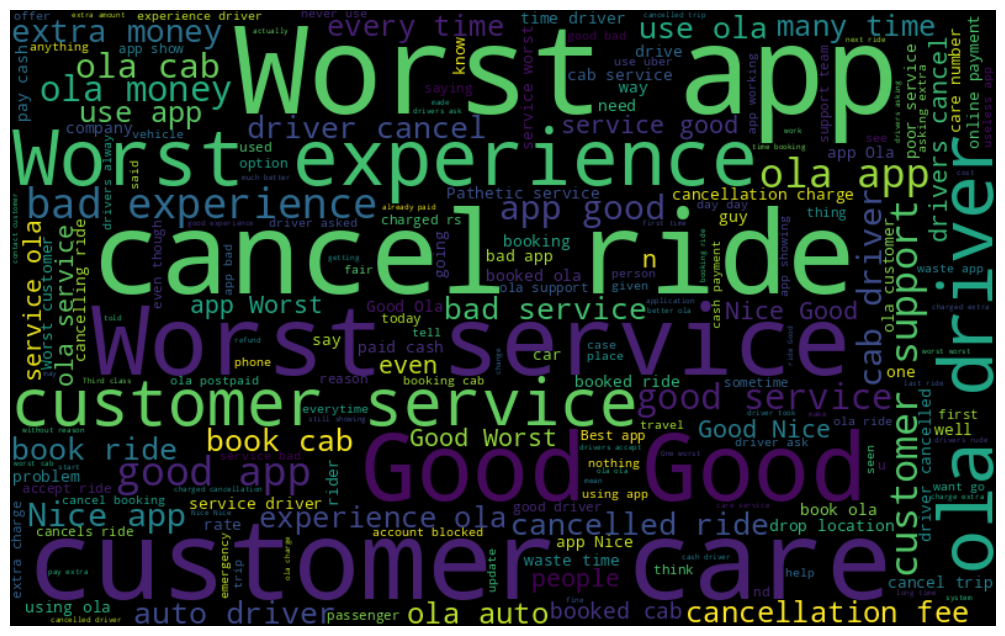

In [41]:
# visualize the frequent words
all_words=' '.join([sentence for sentence in data_ola['clean_description']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
# plot the graph
plt.figure(figsize=(16,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

**we see in word cloud that the negative words are close to the positive words in size that is because negative reviews are close to positive reviews in percentage**

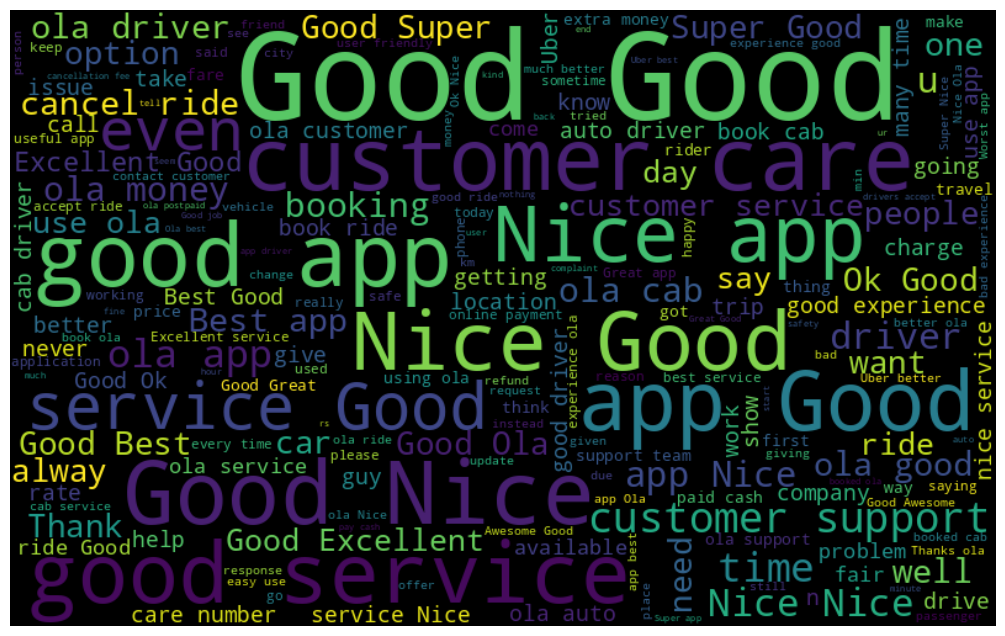

In [42]:
# frequent words visualisation for positive words
pos_words=' '.join([sentence for sentence in data_ola['clean_description'][data_ola['sentiment']=='positive']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(pos_words)
# plot the graph
plt.figure(figsize=(16,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

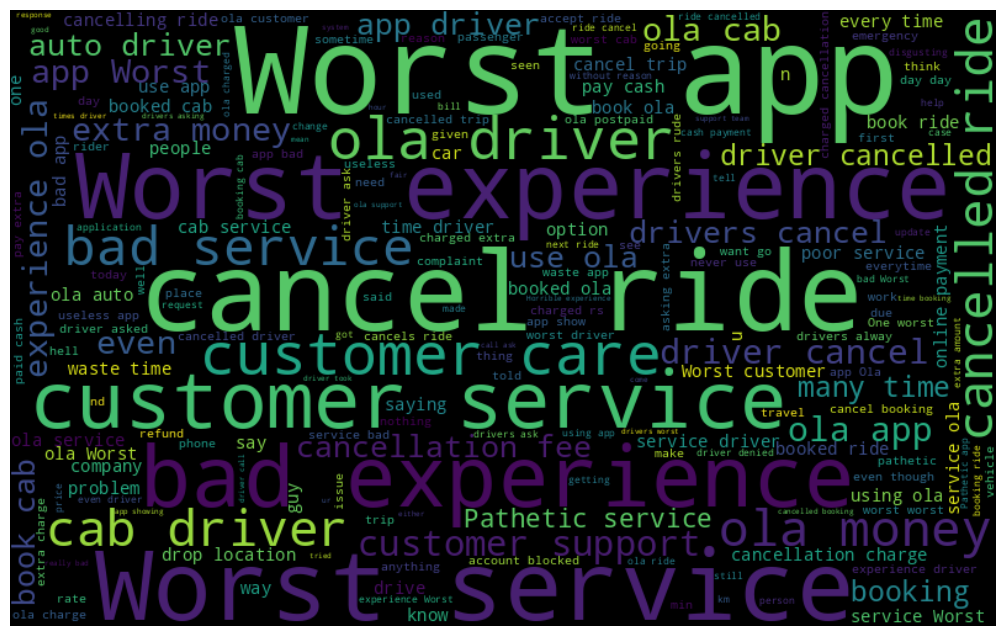

In [43]:
# frequent words visualisation for negative words
neg_words=' '.join([sentence for sentence in data_ola['clean_description'][data_ola['sentiment']=='negative']])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(neg_words)
# plot the graph
plt.figure(figsize=(16,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# from EDA for Ola service this service is not good and need more improvements on service at all especially customer service and cab driver as shown in word cloud for negative reviews  

# dteremine positive and negative reviews only to train the classification model to predict the polarity for reviews

In [44]:
data_ola = data_ola[~data_ola['sentiment'].isin(['neautral'])]

In [45]:
data_ola['label']=data_ola['sentiment'].replace({'negative':0,'positive':1})

In [46]:
data_ola

review_description  rating review_date  \
0       The map in Ola is so messed up, i have to pay ...       1  2023-08-10   
2       Such aa irresponsible app more then I waiting ...       1  2023-08-10   
3                                                   Worst       1  2023-08-10   
5       Ola drivers demanding extra money for ride.......       2  2023-08-10   
6       Pathetic service. No option to contact with th...       1  2023-08-10   
...                                                   ...     ...         ...   
357693  The app is useless for new users since you can...       1  2015-03-08   
357694  Do not recharge money with ola money.. I have ...       1  2015-03-02   
357695  The app hangs on signup. Later I get authentic...       2  2015-03-02   
357696  one of the worst app for iphone.i was tried mu...       1  2015-02-17   
357697  This company is hopeless. I waited on hold for...       1  2014-10-16   

                                        clean_description  \
0       map Ola messed pay Rs extra map incorrect app ...   
2       aa irresponsible app waiting hour waste app pl...   
3                                                   Worst   
5       Ola drivers demanding extra money ride Auto be...   
6       Pathetic service option contact service repres...   
...                                                   ...   
357693     app useless new users since sign referral code   
357694  recharge money ola money recharged rs n dint g...   
357695  app hangs signup Later get authentication code...   
357696  one worst app iphone tried multiple times neve...   
357697  company hopeless waited hold forever couple ti...   

                                                   scores  compound sentiment  \
0       {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...   -0.4215  negative   
2       {'neg': 0.356, 'neu': 0.5, 'pos': 0.144, 'comp...   -0.5267  negative   
3       {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...   -0.6249  negative   
5       {'neg': 0.145, 'neu': 0.534, 'pos': 0.321, 'co...    0.5106  positive   
6       {'neg': 0.206, 'neu': 0.645, 'pos': 0.148, 'co...   -0.4215  negative   
...                                                   ...       ...       ...   
357693  {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...   -0.4215  negative   
357694  {'neg': 0.12, 'neu': 0.788, 'pos': 0.092, 'com...   -0.2023  negative   
357695  {'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...    0.6115  positive   
357696  {'neg': 0.121, 'neu': 0.621, 'pos': 0.257, 'co...    0.5574  positive   
357697  {'neg': 0.319, 'neu': 0.681, 'pos': 0.0, 'comp...   -0.8519  negative   

        label  
0           0  
2           0  
3           0  
5           1  
6           0  
...       ...  
357693      0  
357694      0  
357695      1  
357696      1  
357697      0  

[299017 rows x 8 columns]

In [47]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=.99,min_df=.01,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(data_ola['clean_description'])

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,data_ola['label'],random_state=42,test_size=.25)

In [49]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)

0.8944017122600495

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     31076
           1       0.92      0.90      0.91     43679

    accuracy                           0.89     74755
   macro avg       0.89      0.89      0.89     74755
weighted avg       0.90      0.89      0.89     74755



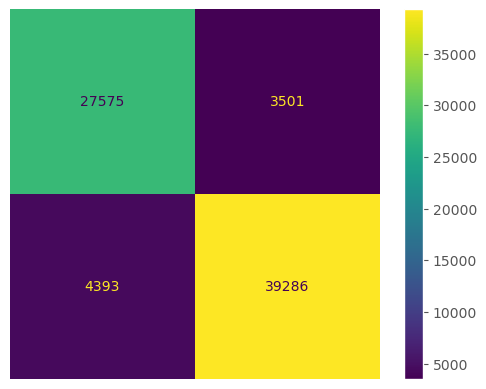

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(pred,y_test))
disp=disp.plot()
plt.axis('off')
print(classification_report(pred,y_test))

# uber customer reviews

In [51]:
data_uber.head()

source                             review_id        user_name  \
0  Google Play  18d6584c-d0e9-4833-a744-f607058aee97        Milky Way   
1  Google Play  50a08f18-cece-4ddf-b617-028844c8aa28   Bradlee Severa   
2  Google Play  b0d8e75a-80a7-4dcd-abaf-72b046dbeeb7    Amit Aggarwal   
3  Google Play  502702a9-25ed-4373-a96c-7fa1f06caacd     Bryant Inman   
4  Google Play  f47a3fb6-23db-49bd-9e63-f33c8d724d07  Addie Whittaker   

  review_title                                 review_description  rating  \
0          NaN  Suddenly, the driver can't have my location an...       1   
1          NaN  Very cordial.. And helped with a quick turnaro...       5   
2          NaN                               Very good experience       5   
3          NaN                                          All I use       5   
4          NaN  I have enjoyed traveling by Uber my drivers ha...       5   

   thumbs_up          review_date developer_response developer_response_date  \
0        0.0  2023-08-10 17:48:51                NaN                     NaN   
1        0.0  2023-08-10 17:38:35                NaN                     NaN   
2        0.0  2023-08-10 17:38:17                NaN                     NaN   
3        0.0  2023-08-10 17:37:45                NaN                     NaN   
4        0.0  2023-08-10 17:36:56                NaN                     NaN   

    appVersion laguage_code country_code  
0          NaN           en           in  
1  4.485.10000           en           in  
2  4.486.10002           en           in  
3  4.467.10008           en           in  
4  4.486.10002           en           in

# Data Preprocessing

In [52]:
data_uber.shape

(1069616, 13)

In [53]:
data_uber.columns

Index(['source', 'review_id', 'user_name', 'review_title',
       'review_description', 'rating', 'thumbs_up', 'review_date',
       'developer_response', 'developer_response_date', 'appVersion',
       'laguage_code', 'country_code'],
      dtype='object')

# drop unnecessary columns

In [54]:
data_uber=data_uber.drop(['source','review_id','user_name','review_title','thumbs_up','developer_response','developer_response_date','appVersion','laguage_code','country_code'],axis=1)
data_uber

review_description  rating  \
0        Suddenly, the driver can't have my location an...       1   
1        Very cordial.. And helped with a quick turnaro...       5   
2                                     Very good experience       5   
3                                                All I use       5   
4        I have enjoyed traveling by Uber my drivers ha...       5   
...                                                    ...     ...   
1069611  I tried to find away to report problems direct...       3   
1069612  I used to love Uber, specially the Uber pool s...       2   
1069613  If I wanted to take a bus to be dropped off on...       1   
1069614  Hello\n\nSTORY TIME\n\nI wanted to delete JUST...       1   
1069615  The past couple times I’ve ridden with Uber, I...       1   

                 review_date  
0        2023-08-10 17:48:51  
1        2023-08-10 17:38:35  
2        2023-08-10 17:38:17  
3        2023-08-10 17:37:45  
4        2023-08-10 17:36:56  
...                      ...  
1069611  2019-02-20 19:41:25  
1069612  2019-01-24 12:13:39  
1069613  2019-01-14 16:53:31  
1069614  2019-01-06 17:19:59  
1069615  2019-01-06 12:34:01  

[1069616 rows x 3 columns]

# drop duplicated values

In [55]:
data_uber.duplicated().sum()

31

In [56]:
data_uber=data_uber.drop_duplicates()

# convert date column to datetime

In [57]:
data_uber['review_date'] = pd.to_datetime(data_uber['review_date']).dt.strftime('%Y-%m-%d')

In [58]:
data_uber['review_date'] = pd.to_datetime(data_uber['review_date'])

In [59]:
data_uber.isna().sum()

review_description    115
rating                  0
review_date             0
dtype: int64

# drop missing values

In [60]:
data_uber=data_uber.dropna()
data_uber.isna().sum()

review_description    0
rating                0
review_date           0
dtype: int64

In [61]:
data_uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069470 entries, 0 to 1069615
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   review_description  1069470 non-null  object        
 1   rating              1069470 non-null  int64         
 2   review_date         1069470 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 32.6+ MB


In [62]:
data_uber

review_description  rating review_date
0        Suddenly, the driver can't have my location an...       1  2023-08-10
1        Very cordial.. And helped with a quick turnaro...       5  2023-08-10
2                                     Very good experience       5  2023-08-10
3                                                All I use       5  2023-08-10
4        I have enjoyed traveling by Uber my drivers ha...       5  2023-08-10
...                                                    ...     ...         ...
1069611  I tried to find away to report problems direct...       3  2019-02-20
1069612  I used to love Uber, specially the Uber pool s...       2  2019-01-24
1069613  If I wanted to take a bus to be dropped off on...       1  2019-01-14
1069614  Hello\n\nSTORY TIME\n\nI wanted to delete JUST...       1  2019-01-06
1069615  The past couple times I’ve ridden with Uber, I...       1  2019-01-06

[1069470 rows x 3 columns]

# data preprocessing and cleaning reviews feature by NLTK and re libraries

In [63]:
# Remove stop words
data_uber['clean_description'] = data_uber['review_description'].apply(lambda x: ' '.join([word for word in re.sub(r'[^a-zA-Z]', ' ', x).split() if word.lower() not in stopwords]))

# Remove numbers
data_uber['clean_description'] = data_uber['clean_description'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove non-ASCII characters
data_uber['clean_description'] = data_uber['clean_description'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# Remove punctuation
data_uber['clean_description'] = data_uber['clean_description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


In [64]:
data_uber

review_description  rating  \
0        Suddenly, the driver can't have my location an...       1   
1        Very cordial.. And helped with a quick turnaro...       5   
2                                     Very good experience       5   
3                                                All I use       5   
4        I have enjoyed traveling by Uber my drivers ha...       5   
...                                                    ...     ...   
1069611  I tried to find away to report problems direct...       3   
1069612  I used to love Uber, specially the Uber pool s...       2   
1069613  If I wanted to take a bus to be dropped off on...       1   
1069614  Hello\n\nSTORY TIME\n\nI wanted to delete JUST...       1   
1069615  The past couple times I’ve ridden with Uber, I...       1   

        review_date                                  clean_description  
0        2023-08-10  Suddenly driver location calling ask going rea...  
1        2023-08-10     cordial helped quick turnaround ride Well done  
2        2023-08-10                                    good experience  
3        2023-08-10                                                use  
4        2023-08-10  enjoyed traveling Uber drivers polite good con...  
...             ...                                                ...  
1069611  2019-02-20  tried find away report problems directly Uber ...  
1069612  2019-01-24  used love Uber specially Uber pool service aff...  
1069613  2019-01-14  wanted take bus dropped corner walk couple blo...  
1069614  2019-01-06  Hello STORY TIME wanted delete driving partner...  
1069615  2019-01-06  past couple times ridden Uber quite issues dri...  

[1069470 rows x 4 columns]

# calculate polarity scores for reviews

In [65]:
sid=SentimentIntensityAnalyzer()
data_uber['scores']=data_uber['clean_description'].apply(lambda clean_description:sid.polarity_scores(clean_description))

In [66]:
data_uber

review_description  rating  \
0        Suddenly, the driver can't have my location an...       1   
1        Very cordial.. And helped with a quick turnaro...       5   
2                                     Very good experience       5   
3                                                All I use       5   
4        I have enjoyed traveling by Uber my drivers ha...       5   
...                                                    ...     ...   
1069611  I tried to find away to report problems direct...       3   
1069612  I used to love Uber, specially the Uber pool s...       2   
1069613  If I wanted to take a bus to be dropped off on...       1   
1069614  Hello\n\nSTORY TIME\n\nI wanted to delete JUST...       1   
1069615  The past couple times I’ve ridden with Uber, I...       1   

        review_date                                  clean_description  \
0        2023-08-10  Suddenly driver location calling ask going rea...   
1        2023-08-10     cordial helped quick turnaround ride Well done   
2        2023-08-10                                    good experience   
3        2023-08-10                                                use   
4        2023-08-10  enjoyed traveling Uber drivers polite good con...   
...             ...                                                ...   
1069611  2019-02-20  tried find away report problems directly Uber ...   
1069612  2019-01-24  used love Uber specially Uber pool service aff...   
1069613  2019-01-14  wanted take bus dropped corner walk couple blo...   
1069614  2019-01-06  Hello STORY TIME wanted delete driving partner...   
1069615  2019-01-06  past couple times ridden Uber quite issues dri...   

                                                    scores  
0        {'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound...  
1        {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...  
2        {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...  
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
4        {'neg': 0.0, 'neu': 0.411, 'pos': 0.589, 'comp...  
...                                                    ...  
1069611  {'neg': 0.033, 'neu': 0.948, 'pos': 0.019, 'co...  
1069612  {'neg': 0.123, 'neu': 0.714, 'pos': 0.163, 'co...  
1069613  {'neg': 0.059, 'neu': 0.896, 'pos': 0.045, 'co...  
1069614  {'neg': 0.187, 'neu': 0.728, 'pos': 0.085, 'co...  
1069615  {'neg': 0.159, 'neu': 0.671, 'pos': 0.17, 'com...  

[1069470 rows x 5 columns]

# convert polarity scores into positive & neuatral and negative in compound

In [67]:
data_uber['compound']=data_uber['scores'].apply(lambda x:x['compound'])

In [68]:
def getsentiment(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neautral'
    else:
        return 'positive'
# create a new column to store the sentiment
data_uber['sentiment']=data_uber['compound'].apply(getsentiment)

In [69]:
data_uber

review_description  rating  \
0        Suddenly, the driver can't have my location an...       1   
1        Very cordial.. And helped with a quick turnaro...       5   
2                                     Very good experience       5   
3                                                All I use       5   
4        I have enjoyed traveling by Uber my drivers ha...       5   
...                                                    ...     ...   
1069611  I tried to find away to report problems direct...       3   
1069612  I used to love Uber, specially the Uber pool s...       2   
1069613  If I wanted to take a bus to be dropped off on...       1   
1069614  Hello\n\nSTORY TIME\n\nI wanted to delete JUST...       1   
1069615  The past couple times I’ve ridden with Uber, I...       1   

        review_date                                  clean_description  \
0        2023-08-10  Suddenly driver location calling ask going rea...   
1        2023-08-10     cordial helped quick turnaround ride Well done   
2        2023-08-10                                    good experience   
3        2023-08-10                                                use   
4        2023-08-10  enjoyed traveling Uber drivers polite good con...   
...             ...                                                ...   
1069611  2019-02-20  tried find away report problems directly Uber ...   
1069612  2019-01-24  used love Uber specially Uber pool service aff...   
1069613  2019-01-14  wanted take bus dropped corner walk couple blo...   
1069614  2019-01-06  Hello STORY TIME wanted delete driving partner...   
1069615  2019-01-06  past couple times ridden Uber quite issues dri...   

                                                    scores  compound sentiment  
0        {'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound...   -0.4576  negative  
1        {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...    0.2732  positive  
2        {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...    0.4404  positive  
3        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  neautral  
4        {'neg': 0.0, 'neu': 0.411, 'pos': 0.589, 'comp...    0.8876  positive  
...                                                    ...       ...       ...  
1069611  {'neg': 0.033, 'neu': 0.948, 'pos': 0.019, 'co...   -0.2782  negative  
1069612  {'neg': 0.123, 'neu': 0.714, 'pos': 0.163, 'co...    0.7351  positive  
1069613  {'neg': 0.059, 'neu': 0.896, 'pos': 0.045, 'co...    0.0000  neautral  
1069614  {'neg': 0.187, 'neu': 0.728, 'pos': 0.085, 'co...   -0.9186  negative  
1069615  {'neg': 0.159, 'neu': 0.671, 'pos': 0.17, 'com...    0.2297  positive  

[1069470 rows x 7 columns]

# calculate the positive and negative reviews percentage

<Axes: ylabel='sentiment'>

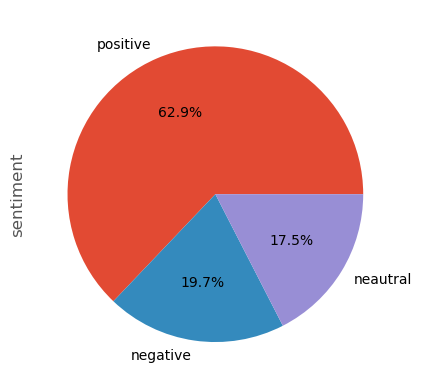

In [70]:
data_uber['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# the positive reviews are higher than negative reviews by 3times and this is better than Ola service

<Axes: ylabel='rating'>

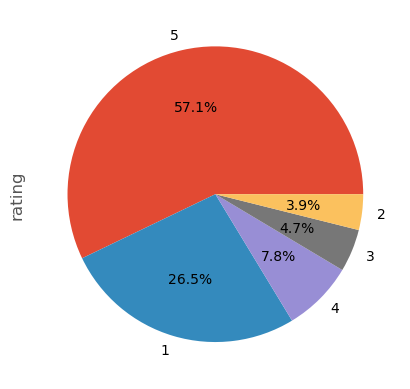

In [71]:
data_uber['rating'].value_counts().plot(kind='pie',autopct='%1.1f%%')

**as we see the 5 star rating is very high that is because there are too much positive reviews**

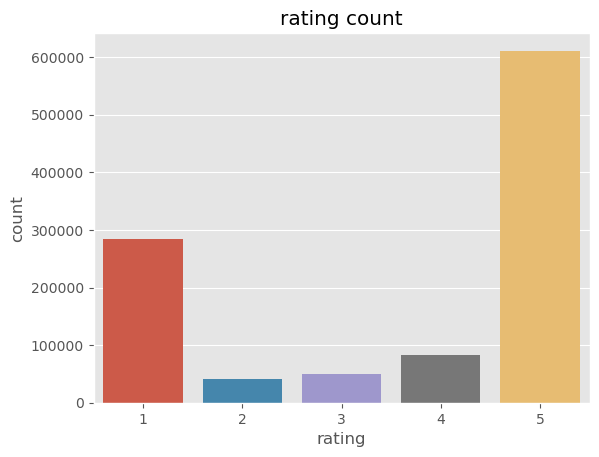

In [72]:
sns.countplot(data=data_uber,x='rating')
plt.title('rating count')
plt.show()

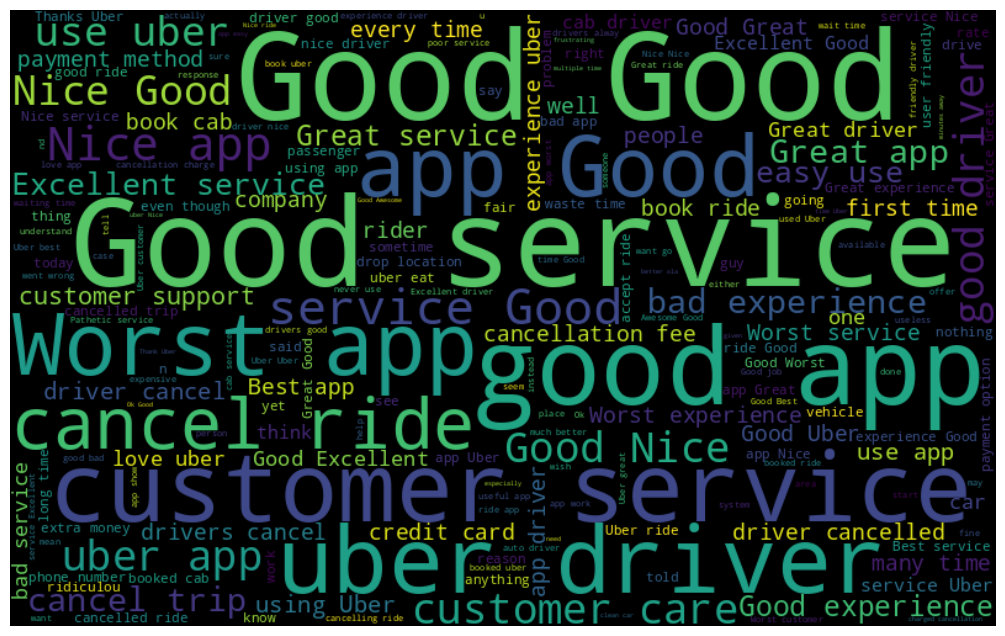

In [73]:
# visualize the frequent words
all_words=' '.join([sentence for sentence in data_uber['clean_description']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)
# plot the graph
plt.figure(figsize=(16,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

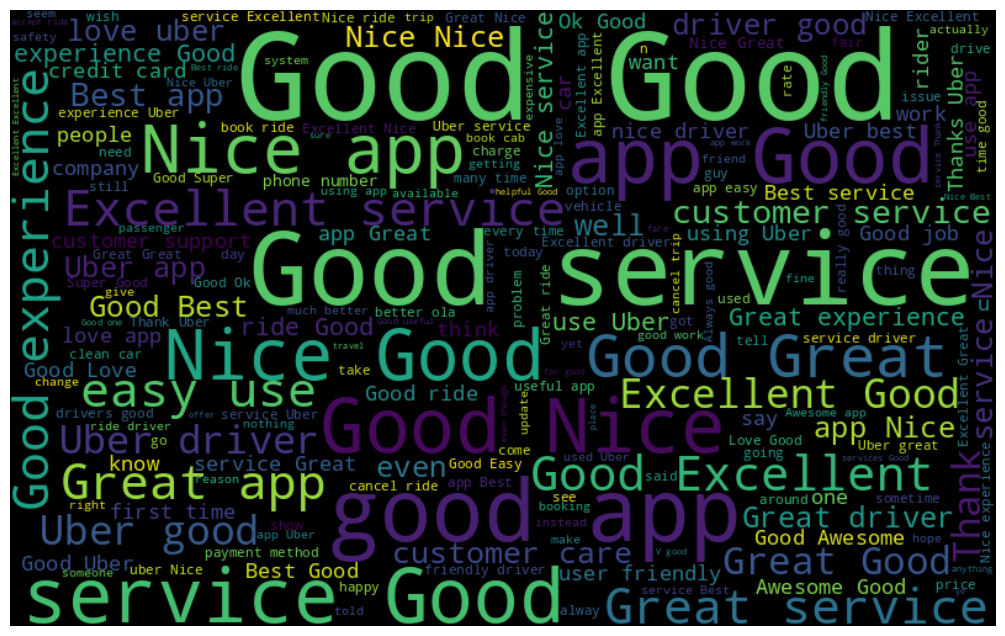

In [74]:
# frequent words visualisation for positive words
pos_words=' '.join([sentence for sentence in data_uber['clean_description'][data_uber['sentiment']=='positive']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(pos_words)
# plot the graph
plt.figure(figsize=(16,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

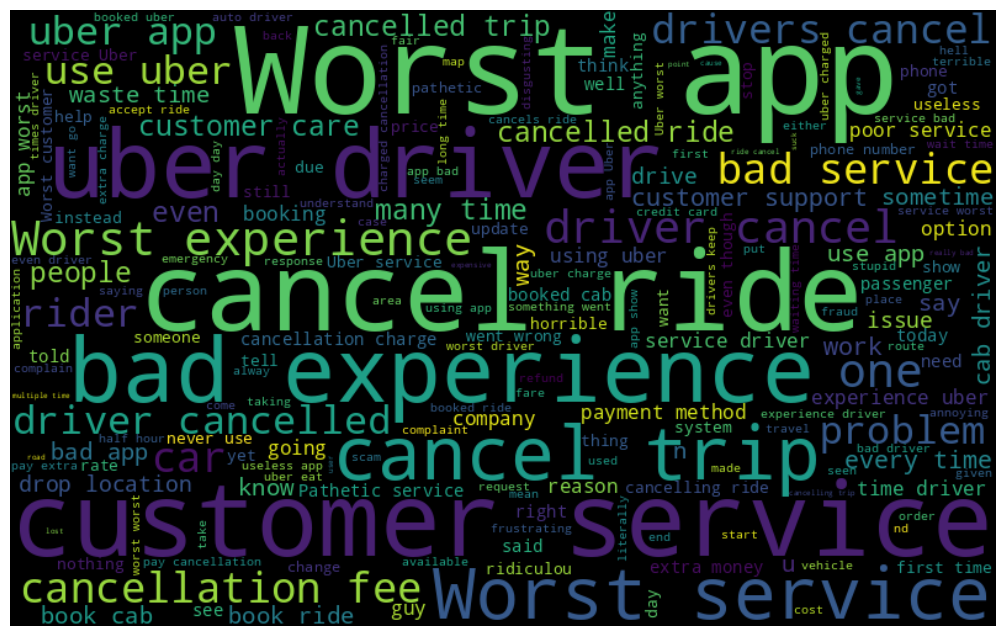

In [75]:
# frequent words visualisation for negative words
neg_words=' '.join([sentence for sentence in data_uber['clean_description'][data_uber['sentiment']=='negative']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(neg_words)
# plot the graph
plt.figure(figsize=(16,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [76]:
data_uber = data_uber[~data_uber['sentiment'].isin(['neautral'])]

In [77]:
data_uber['label']=data_uber['sentiment'].replace({'negative':0,'positive':1})

In [78]:
data_uber

review_description  rating  \
0        Suddenly, the driver can't have my location an...       1   
1        Very cordial.. And helped with a quick turnaro...       5   
2                                     Very good experience       5   
4        I have enjoyed traveling by Uber my drivers ha...       5   
5        App is good but main problem is the drivers ca...       1   
...                                                    ...     ...   
1069610  So I love uber, its really convenient. But...I...       4   
1069611  I tried to find away to report problems direct...       3   
1069612  I used to love Uber, specially the Uber pool s...       2   
1069614  Hello\n\nSTORY TIME\n\nI wanted to delete JUST...       1   
1069615  The past couple times I’ve ridden with Uber, I...       1   

        review_date                                  clean_description  \
0        2023-08-10  Suddenly driver location calling ask going rea...   
1        2023-08-10     cordial helped quick turnaround ride Well done   
2        2023-08-10                                    good experience   
4        2023-08-10  enjoyed traveling Uber drivers polite good con...   
5        2023-08-10  App good main problem drivers cancel trip cust...   
...             ...                                                ...   
1069610  2019-03-03  love uber really convenient stationed base som...   
1069611  2019-02-20  tried find away report problems directly Uber ...   
1069612  2019-01-24  used love Uber specially Uber pool service aff...   
1069614  2019-01-06  Hello STORY TIME wanted delete driving partner...   
1069615  2019-01-06  past couple times ridden Uber quite issues dri...   

                                                    scores  compound  \
0        {'neg': 0.3, 'neu': 0.7, 'pos': 0.0, 'compound...   -0.4576   
1        {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...    0.2732   
2        {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...    0.4404   
4        {'neg': 0.0, 'neu': 0.411, 'pos': 0.589, 'comp...    0.8876   
5        {'neg': 0.54, 'neu': 0.24, 'pos': 0.22, 'compo...   -0.7906   
...                                                    ...       ...   
1069610  {'neg': 0.151, 'neu': 0.595, 'pos': 0.253, 'co...    0.8182   
1069611  {'neg': 0.033, 'neu': 0.948, 'pos': 0.019, 'co...   -0.2782   
1069612  {'neg': 0.123, 'neu': 0.714, 'pos': 0.163, 'co...    0.7351   
1069614  {'neg': 0.187, 'neu': 0.728, 'pos': 0.085, 'co...   -0.9186   
1069615  {'neg': 0.159, 'neu': 0.671, 'pos': 0.17, 'com...    0.2297   

        sentiment  label  
0        negative      0  
1        positive      1  
2        positive      1  
4        positive      1  
5        negative      0  
...           ...    ...  
1069610  positive      1  
1069611  negative      0  
1069612  positive      1  
1069614  negative      0  
1069615  positive      1  

[882803 rows x 8 columns]

In [79]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=.99,min_df=.01,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(data_uber['clean_description'])

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,data_uber['label'],random_state=42,test_size=.25)

In [81]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(pred,y_test)

0.8991486218911559

              precision    recall  f1-score   support

           0       0.72      0.83      0.77     45426
           1       0.95      0.92      0.94    175275

    accuracy                           0.90    220701
   macro avg       0.84      0.87      0.85    220701
weighted avg       0.91      0.90      0.90    220701



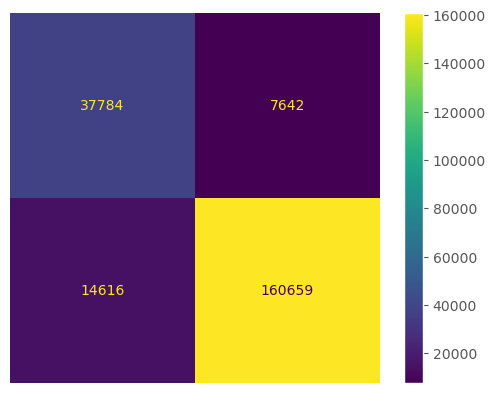

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix
disp=ConfusionMatrixDisplay(confusion_matrix(pred,y_test))
disp=disp.plot()
plt.axis('off')
print(classification_report(pred,y_test))

# at the end and after sentiment analysis by NLP for Ola and Uber services. we find the Uber service is much better than Ola.